# Vis all of the scores with means

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
metric = 'AUC'

In [4]:
df = pd.read_csv(metric+'_mean_noface.csv', index_col=[0])
df_f03 = pd.read_csv(metric+'_mean_face_03.csv', index_col=[0])
df_f05 = pd.read_csv(metric+'_mean_face_05.csv', index_col=[0])
df_f07 = pd.read_csv(metric+'_mean_face_07.csv', index_col=[0])

### Calculate means

In [5]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [6]:
df = calc_means(df)
df_f03 = calc_means(df_f03)
df_f05 = calc_means(df_f05)
df_f07 = calc_means(df_f07)

In [7]:
def drop_means(df):
    df0 = df.drop('mean model')
    df0 = df0.drop('mean context', axis=1)
    return df0

In [8]:
df0 = drop_means(df)
df0_f03 = drop_means(df_f03)
df0_f05 = drop_means(df_f05)
df0_f07 = drop_means(df_f07)


In [9]:
df0_f07

,all,person,no person,animal,sports,electronic
aim,0.674163,0.686218,0.651640,0.660701,0.705678,0.668927
cas,0.701140,0.715308,0.674669,0.690495,0.746190,0.689888
covsal,0.749089,0.756504,0.735235,0.752197,0.759735,0.746879
gbvs,0.752909,0.762269,0.735422,0.756329,0.782433,0.749367
icf,0.716903,0.729096,0.694122,0.709061,0.744237,0.710843
ik,0.664329,0.680528,0.634062,0.659037,0.696871,0.666733
sun,0.634122,0.640278,0.622619,0.596435,0.639483,0.637194


In [10]:
df0_mean_context = df.transpose().loc[['mean context']].transpose().drop('mean model')
df0_mean_context_f03 = df_f03.transpose().loc[['mean context']].transpose().drop('mean model')
df0_mean_context_f05 = df_f05.transpose().loc[['mean context']].transpose().drop('mean model')
df0_mean_context_f07 = df_f07.transpose().loc[['mean context']].transpose().drop('mean model')
df0_mean_context

,mean context
aim,0.669199
cas,0.698027
covsal,0.745238
gbvs,0.753542
icf,0.714938
ik,0.661012
sun,0.620407
dg,0.778239


In [11]:
df0_mean_model = df.loc[['mean model']].transpose().drop('mean context').transpose()
df0_mean_model_f03 = df_f03.loc[['mean model']].transpose().drop('mean context').transpose()
df0_mean_model_f05 = df_f05.loc[['mean model']].transpose().drop('mean context').transpose()
df0_mean_model_f07 = df_f07.loc[['mean model']].transpose().drop('mean context').transpose()
df0_mean_model

,all,person,no person,animal,sports,electronic
mean model,0.703171,0.711458,0.687688,0.698729,0.731504,0.697901


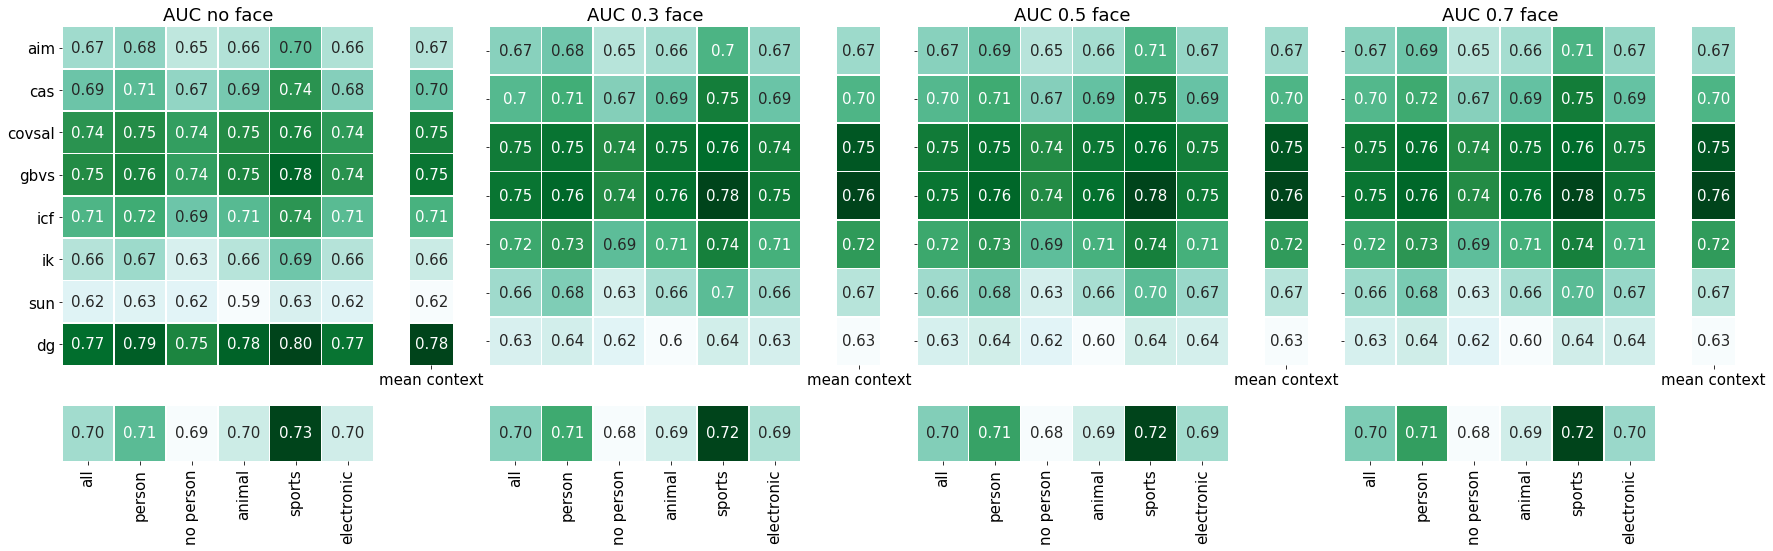

In [12]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 8,
                       width_ratios=[7, 1, 7, 1, 7, 1, 7, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[8])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[10])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[12])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[14])

im = sns.heatmap(df0, annot=True, linewidths=.5, ax=ax01, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model, annot=True, linewidths=.5, ax=ax03, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context, annot=True, linewidths=.5, ax=ax02, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f03, annot=True, linewidths=.5, ax=ax11, cmap='BuGn', cbar=False, xticklabels='');
sns.heatmap(df0_mean_model_f03, annot=True, linewidths=.5, ax=ax13, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f03, annot=True, linewidths=.5, ax=ax12, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f05, annot=True, linewidths=.5, ax=ax21, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f05, annot=True, linewidths=.5, ax=ax23, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f05, annot=True, linewidths=.5, ax=ax22, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f07, annot=True, linewidths=.5, ax=ax31, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f07, annot=True, linewidths=.5, ax=ax33, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f07, annot=True, linewidths=.5, ax=ax32, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('{} no face'.format(metric));
ax11.set_title('{} 0.3 face'.format(metric));
ax21.set_title('{} 0.5 face'.format(metric));
ax31.set_title('{} 0.7 face'.format(metric));
plt.savefig('../plots/'+'{}_sep_with_mean.jpg'.format(metric), bbox_inches='tight', pad_inches=0)